# Loading up the given data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('takehome_users.csv', sep=',' , encoding='latin-1')
df.head()


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
df1 = pd.read_csv('takehome_user_engagement.csv')
df1

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [4]:
df.shape

(12000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [6]:
df1.shape

(207917, 3)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


# Exploratory Data Analysis

In [8]:
df.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

In [9]:
df.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [10]:
df["last_session_creation_time"].describe()

count    8.823000e+03
mean     1.379279e+09
std      1.953116e+07
min      1.338452e+09
25%      1.363195e+09
50%      1.382888e+09
75%      1.398443e+09
max      1.402067e+09
Name: last_session_creation_time, dtype: float64

In [11]:
df["invited_by_user_id"].isnull().sum()

5583

In [12]:
df["last_session_creation_time"] = df["last_session_creation_time"].fillna(df["last_session_creation_time"].mean())

In [13]:
df["last_session_creation_time"].isnull().sum()

0

In [14]:
df["invited_by_user_id"]

0        10803.0
1          316.0
2         1525.0
3         5151.0
4         5240.0
          ...   
11995     8263.0
11996        NaN
11997     8074.0
11998        NaN
11999        NaN
Name: invited_by_user_id, Length: 12000, dtype: float64

In [15]:
df["invited_by_user_id"].describe()

count     6417.000000
mean      5962.957145
std       3383.761968
min          3.000000
25%       3058.000000
50%       5954.000000
75%       8817.000000
max      11999.000000
Name: invited_by_user_id, dtype: float64

In [16]:
np.median(df["invited_by_user_id"])

nan

In [17]:
df = df.dropna()

In [18]:
df.isnull().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
dtype: int64

In [19]:
df.duplicated().value_counts()

False    6417
dtype: int64

In [20]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


# Labelling users as Adopted

In [21]:
import datetime
df1.time_stamp = pd.to_datetime(df1.time_stamp)
df1 = df1.set_index('time_stamp', drop = True)

In [22]:
from datetime import timedelta
def label_adopted(x):
   
    df_temp = df1.loc[df1['user_id'] == x] 
    df_temp = df_temp.resample('D').mean().dropna()
    adopted = 0
    for i in range(len(df_temp)-2): 
        if df_temp.index[i + 2] - df_temp.index[i] <= timedelta(days=7):
            adopted = 1
            break
        else:
            adopted = 0
    return adopted

In [23]:
df['adopted_df'] = df['object_id'].apply(label_adopted)

# Showing the active users

In [24]:
print(sum(df['adopted_df']))
print(sum(df.adopted_df)/len(df.adopted_df))

943
0.14695340501792115


In [25]:
df.creation_time = pd.to_datetime(df.creation_time)

df['last_session_creation_time'] = df['last_session_creation_time'].map(lambda data: 
                                    datetime.datetime.fromtimestamp(int(data)).strftime('%Y-%m-%d %H:%M:%S'),
                                                                              na_action='ignore')

In [26]:
df['last_session_creation_time'] = pd.to_datetime(df['last_session_creation_time'])
df['usage_length'] = df['last_session_creation_time'] - df['creation_time']
df['usage_length'] = [x.total_seconds() for x in df['usage_length']]


In [27]:
df['email_provider'] = [x.split('@')[1] for x in df.email]#select out the domain
top_emails = df.email_provider.value_counts().index[:6]
df['email_provider'] = [x if x in top_emails else 'other' for x in df.email_provider]

In [28]:
df.invited_by_df_id =df.invited_by_user_id.fillna(0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4224\3713927531.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.invited_by_df_id =df.invited_by_user_id.fillna(0)


In [30]:
feature_df = df.iloc[:,4:]
feature_df = feature_df.drop('last_session_creation_time', axis=1)
feature_df['usage_length'] = feature_df['usage_length'].fillna(0)

In [32]:
from sklearn.preprocessing import LabelEncoder

gle = LabelEncoder()
creation_labels = gle.fit_transform(df['creation_source'])
feature_df.creation_source = creation_labels

org_id_labels = gle.fit_transform(df['org_id'])
feature_df.org_id = org_id_labels

invited_labels = gle.fit_transform(df['invited_by_user_id'])
feature_df.org_id = invited_labels

email_labels = gle.fit_transform(df['email_provider'])
feature_df.email_provider = email_labels


In [33]:
feature_df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_df,usage_length,email_provider
0,0,1,0,2324,10803.0,0,19800.0,6
1,1,0,0,55,316.0,1,11770200.0,2
2,1,0,0,297,1525.0,0,19800.0,2
3,0,0,0,1103,5151.0,0,106200.0,6
4,0,0,0,1126,5240.0,0,451800.0,6


In [36]:
from sklearn.model_selection import train_test_split


data = feature_df.drop('adopted_df', axis=1)
labels = feature_df.adopted_df

X_train, y_train, X_test, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

In [37]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(class_weight='balanced_subsample')

rf.fit(X_train, X_test)

rf.score(y_train, y_test)


0.8668555240793201

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf.predict(y_train)

print(classification_report(y_test, y_pred))

cm= confusion_matrix(y_test,y_pred)
print('confusion matrix:')
print(cm)


              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1796
           1       0.59      0.43      0.49       322

    accuracy                           0.87      2118
   macro avg       0.74      0.69      0.71      2118
weighted avg       0.85      0.87      0.86      2118

confusion matrix:
[[1699   97]
 [ 185  137]]


In [39]:
feature_importance = pd.DataFrame()
feature_importance['coef'] = rf.feature_importances_
feature_importance = feature_importance.set_index(data.columns)
feature_importance.coef.nlargest(10)

usage_length                  0.724094
org_id                        0.109494
invited_by_user_id            0.107543
email_provider                0.036153
creation_source               0.007894
opted_in_to_mailing_list      0.007650
enabled_for_marketing_drip    0.007172
Name: coef, dtype: float64

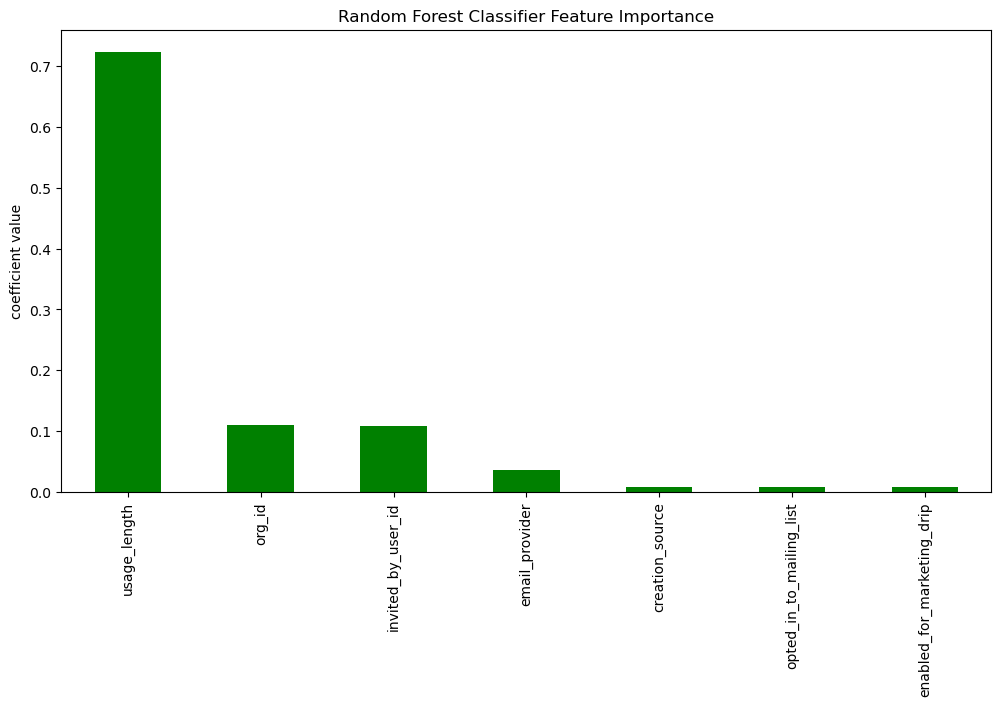

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
(feature_importance['coef']).nlargest(10).plot(kind='bar', x=feature_importance.index, color = 'g')
plt.title('Random Forest Classifier Feature Importance')
plt.ylabel('coefficient value')
plt.show()


In [41]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

In [42]:
adopted = feature_df.usage_length.loc[feature_df['adopted_df'] == 1]
not_adopted = feature_df.usage_length.loc[feature_df['adopted_df'] == 0]


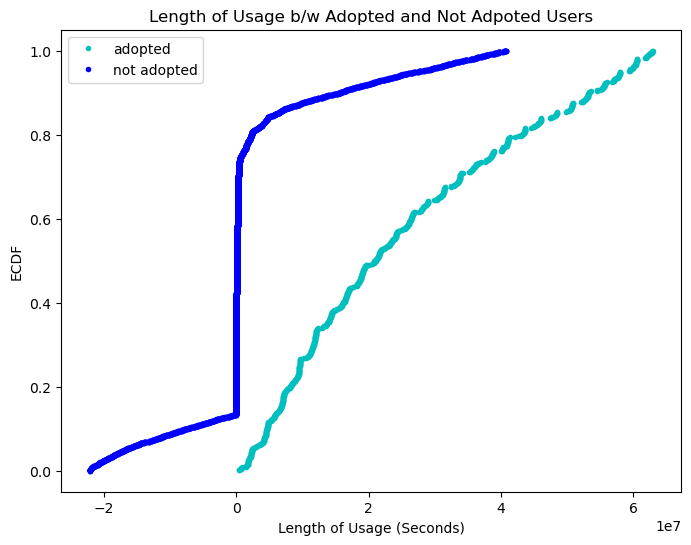

In [44]:
%matplotlib inline
plt.figure(figsize=(8,6))

x_active, y_active = ecdf(adopted)
x_inactive, y_inactive = ecdf(not_adopted)

plt.plot(x_active, y_active, marker='.', linestyle='none',color = 'c')
plt.plot(x_inactive, y_inactive, marker='.', linestyle='none', color = 'b')
plt.title('Length of Usage b/w Adopted and Not Adpoted Users')
plt.xlabel('Length of Usage (Seconds)')
plt.ylabel('ECDF')
plt.legend(['adopted', 'not adopted'])
plt.show()